In [1]:
import qctoolkit as qtk
import numpy as np
import glob
import copy
import matplotlib.pyplot as plt

%matplotlib inline

/home/samio/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
mol = qtk.Molecule('xyz/gaas_2.xyz')
mol.extend([4,4,4])
mol.name = 'gaas_ref'

def mutate(ind):
    mut = mol.copy()
    mut.setAtoms(ind, Z = 13)
    return mut

# mut_01 = mutate([0,2])
# mut_01.name = 'test_gaas_m01'
# mut_02 = mutate([0,2,4,6])
# mut_02.name = 'test_gaas_m02'
# mut_03 = mutate([0,2,4,6,8,10])
# mut_03.name = 'test_gaas_m03'
# mut_04 = mutate([0,2,4,6,8,10,12,14])
# mut_04.name = 'test_gaas_m99'

In [3]:
qmsetting = {
    'program': 'abinit',
    #'cutoff': 10,
    'kmesh': [3, 3, 3],
    #'cutoff': 50,
    #'kmesh': [6,6,6],
    'band_scan': [
     [20, 20],
     [[2.0, 0.0, 1.0], # L
      [0.0, 0.0, 0.0],   # Gamma
      [0.0, 2.0, 2.0],   # X
     ]],
    'threads': 4,
    'overwrite': True,
    'ks_states': 24,
    'save_restart': True,
    'save_density': True,
    'abinit_setting': ['chkprim 0'],
}

In [4]:
rst_root = '/home/samio/Works/PhD/projects/01_AlGaAs/60_Eg/04_band_folding/test_gaas_222'
qmsetting_rst = {
    'program': 'abinit',
    'cutoff': 10,
    #'kmesh': [2, 2, 2],
    #'cutoff': 50,
    #'kmesh': [6,6,6],
    'band_scan': [
     [20, 20],
     [[1.0, 0.0, 0.5], # L
      [0.0, 0.0, 0.0],   # Gamma
      [0.0, 1.0, 1.0],   # X
     ]],
    'threads': 2,
    'overwrite': True,
    'ks_states': 16,
    'save_restart': True,
    'save_density': True,
    'abinit_setting': ['chkprim 0'],
    'restart_density_file': rst_root + '/test_gaas_222o_DS1_DEN',
    'restart_wavefunction_file': rst_root + '/test_gaas_222o_DS2_WFK',
    'scf_step': 1,
    'link_dep': True,
    'wf_convergence': 1E5,
    'restart': True,
    'restart_density': True,
}

In [5]:
inp = qtk.QMInp(mol, **qmsetting)
inp_01 = qtk.QMInp(mut_01, **qmsetting)
inp_02 = qtk.QMInp(mut_02, **qmsetting)
inp_03 = qtk.QMInp(mut_03, **qmsetting)
inp_04 = qtk.QMInp(mut_04, **qmsetting)

In [6]:
#out = inp.run()
#out_01 = inp_01.run()
#out_02 = inp_02.run()
#out_03 = inp_03.run()
#out_04 = inp_04.run()

out = qtk.QMOut('test_gaas_222/test_gaas_222.out', program='abinit')
out_01 = qtk.QMOut('test_gaas_m01/test_gaas_m01.out', program='abinit')
out_02 = qtk.QMOut('test_gaas_m02/test_gaas_m02.out', program='abinit')
out_03 = qtk.QMOut('test_gaas_m03/test_gaas_m03.out', program='abinit')
out_04 = qtk.QMOut('test_gaas_m04/test_gaas_m04.out', program='abinit')

more than one o_EIG files found loading last file with name: test_gaas_222/test_gaas_222o_DS2_EIG
more than one o_EIG files found loading last file with name: test_gaas_m01/test_gaas_m01o_DS2_EIG
more than one o_EIG files found loading last file with name: test_gaas_m02/test_gaas_m02o_DS2_EIG
more than one o_EIG files found loading last file with name: test_gaas_m03/test_gaas_m03o_DS2_EIG
more than one o_EIG files found loading last file with name: test_gaas_m04/test_gaas_m04o_DS2_EIG


/home/samio/.local/lib/python2.7/site-packages/qctoolkit-0.0.13-py2.7-linux-x86_64.egg/qctoolkit/utilities/tools.py:67: RuntimeWarning: invalid value encountered in sqrt
  sc = np.sqrt(1-cc**2) # sin(gamma) = sqrt(1-cos(gamma)^2)


In [10]:
def plotB(out, shift=None):
    plt.figure()
    L, E, W = out.unfold([[0.5, 0.0, 0.25],[0.0, 0.0, 0.0],[0.0, 0.5, 0.5]], [2,2,2], shift=shift)
    inds = []
    w_list = np.arange(0,1.1,0.2)
    for i in range(len(w_list) - 1):
        inds.append((W>=w_list[i]) * (W<w_list[i+1]))

    for i in range(len(inds)):
        ind = inds[i]
        plt.plot(L[ind], E[ind], ls='', marker='o', markersize=1.5*i + 1)
    plt.xlim([min(L), max(L)])

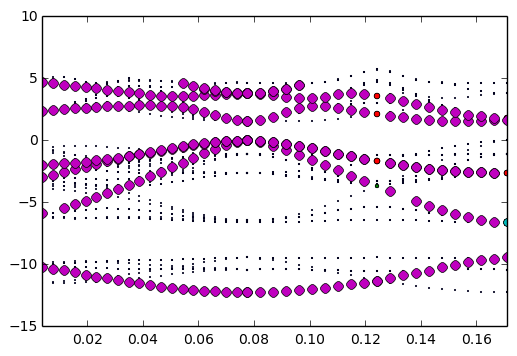

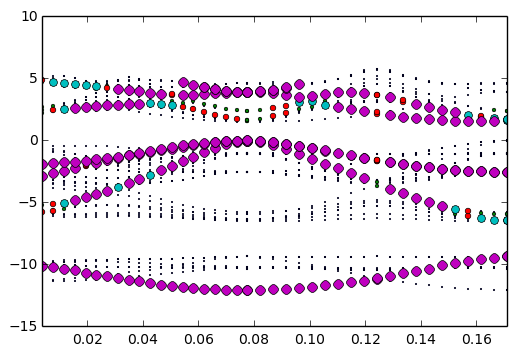

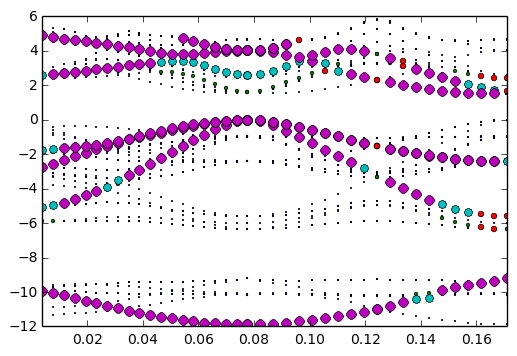

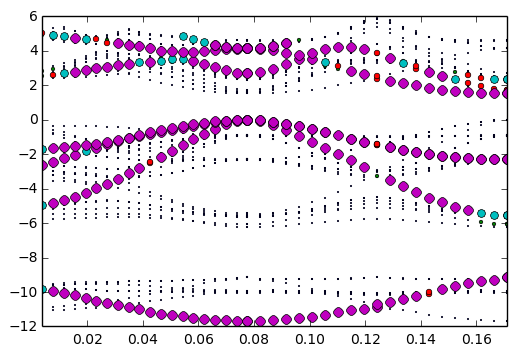

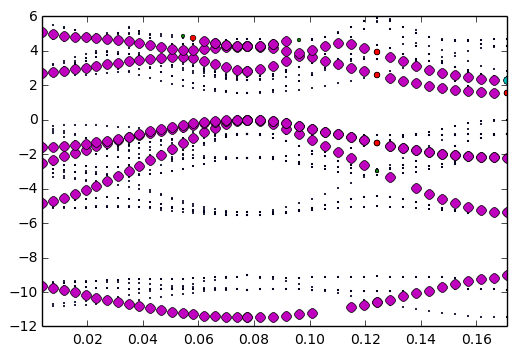

In [15]:
plotB(out)
plotB(out_01)
plotB(out_02)
plotB(out_03)
plotB(out_04)

In [8]:
rst_01 = qtk.QMInp(mut_01, **qmsetting_rst)
rst_01.molecule.name = 'rst_01'
rst_02 = qtk.QMInp(mut_02, **qmsetting_rst)
rst_02.molecule.name = 'rst_02'
rst_03 = qtk.QMInp(mut_03, **qmsetting_rst)
rst_03.molecule.name = 'rst_03'
rst_04 = qtk.QMInp(mut_04, **qmsetting_rst)
rst_04.molecule.name = 'rst_04'

In [13]:
out_r01 = rst_01.run()
out_r02 = rst_02.run()
out_r03 = rst_03.run()
out_r04 = rst_04.run()
#out_r01 = qtk.QMOut('rst_01/rst_01.out', program='abinit')
#out.fermi_index

Overwrite existing folder rst_01
QMInp: psppar.Al is linked
QMInp: psppar.Ga is linked
QMInp: psppar.As is linked
QMInp: rst_01i_WFK is linked
QMInp: rst_01i_DEN is linked
QMInp.run: running job with command: mpirun -np 2 abinit < rst_01.files
error when extracting occupation number with error message: list index out of range
QMInp: psppar.Al is linked
QMInp: psppar.Ga is linked
QMInp: psppar.As is linked
QMInp: rst_02i_WFK is linked
QMInp: rst_02i_DEN is linked
QMInp.run: running job with command: mpirun -np 2 abinit < rst_02.files
error when extracting occupation number with error message: list index out of range
QMInp: psppar.Al is linked
QMInp: psppar.Ga is linked
QMInp: psppar.As is linked
QMInp: rst_03i_WFK is linked
QMInp: rst_03i_DEN is linked
QMInp.run: running job with command: mpirun -np 2 abinit < rst_03.files
error when extracting occupation number with error message: list index out of range
QMInp: psppar.Al is linked
QMInp: psppar.As is linked
QMInp: rst_04i_WFK is linked

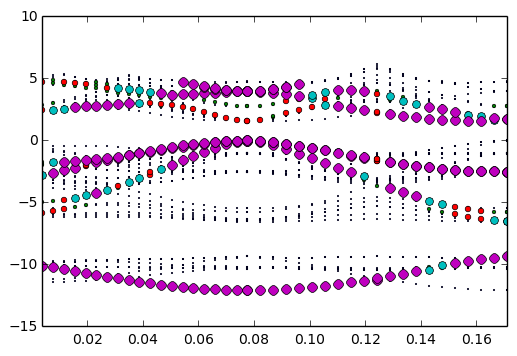

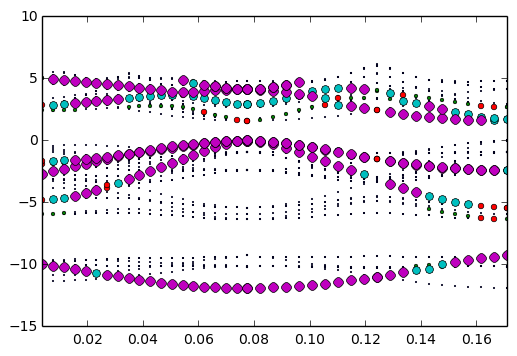

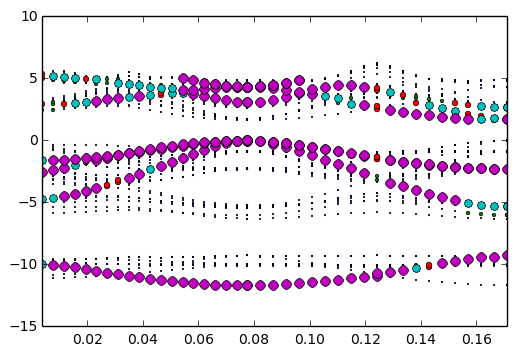

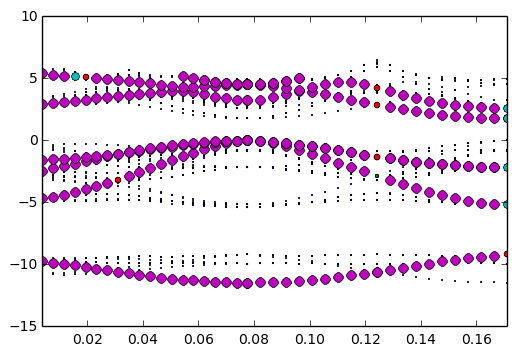

In [17]:
plotB(out_r01, np.max(out_r01.band[:,out.fermi_index]))
plotB(out_r02, np.max(out_r02.band[:,out.fermi_index]))
plotB(out_r03, np.max(out_r03.band[:,out.fermi_index]))
plotB(out_r04, np.max(out_r04.band[:,out.fermi_index]))